<a href="https://colab.research.google.com/github/ntzo-ai/EKPA-exams/blob/main/Ransomware_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.5 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=31e14c55df3c7403a192997df40d7f332a38a82535618e24eb56b33842f02c10
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps

In [2]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [3]:
#eξερεύνηση συνόλου δεδομένων
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [10]:
#αφαίρεση κατηγορικών μεταβλητών
dataset_ok = dataset.drop(['Name', 'md5'], axis=1)

In [11]:
#εμφάνιση τελικού συνόλου για pps
dataset_ok

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,8450,9,0,204288,109056,0,5234,4096,...,3,3.431994,2.813461,3.924979,20092.666667,232,59130,72,16,1
1,332,224,263,2,20,7168,19968,512,4448,4096,...,1,3.484128,3.484128,3.484128,1408.000000,1408,1408,0,18,0
2,332,224,258,10,0,119808,385024,0,61532,4096,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
3,332,224,259,9,0,99328,1148928,0,8924,4096,...,25,4.773984,1.798795,7.944360,43586.800000,16,838656,72,0,0
4,332,224,258,11,0,70656,130048,0,15741,4096,...,7,3.279675,1.798795,5.265436,9899.285714,16,67624,72,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,9,0,549888,376320,0,407468,4096,...,79,3.269348,0.960953,7.983841,1861.063291,20,28240,72,15,0
138043,332,224,258,10,0,119808,385024,0,61532,4096,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
138044,332,224,8450,8,0,212992,118784,0,167508,4096,...,2,4.278011,3.470357,5.085664,626.000000,340,912,72,17,1
138045,332,224,8450,8,0,282624,8192,0,287678,8192,...,1,3.509405,3.509405,3.509405,1016.000000,1016,1016,0,17,1


In [12]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset_ok.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [13]:
#υπολογισμός πίνακα PPS
pps.matrix(dataset_ok)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Machine,Machine,1.0,predict_itself,True,None,0.000000e+00,1.000000e+00,None
1,Machine,SizeOfOptionalHeader,1.0,regression,True,mean absolute error,1.875200e+00,0.000000e+00,DecisionTreeRegressor()
2,Machine,Characteristics,0.0,regression,True,mean absolute error,4.227535e+03,5.232012e+03,DecisionTreeRegressor()
3,Machine,MajorLinkerVersion,0.0,regression,True,mean absolute error,1.689600e+00,1.845421e+00,DecisionTreeRegressor()
4,Machine,MinorLinkerVersion,0.0,regression,True,mean absolute error,3.757400e+00,6.345409e+00,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
3020,legitimate,ResourcesMinSize,0.0,regression,True,mean absolute error,4.836787e+05,9.660988e+05,DecisionTreeRegressor()
3021,legitimate,ResourcesMaxSize,0.0,regression,True,mean absolute error,1.046178e+06,1.982820e+06,DecisionTreeRegressor()
3022,legitimate,LoadConfigurationSize,0.0,regression,True,mean absolute error,9.497017e+05,1.893711e+06,DecisionTreeRegressor()
3023,legitimate,VersionInformationSize,0.0,regression,True,mean absolute error,4.338000e+00,4.811868e+00,DecisionTreeRegressor()


<Axes: xlabel='x', ylabel='y'>

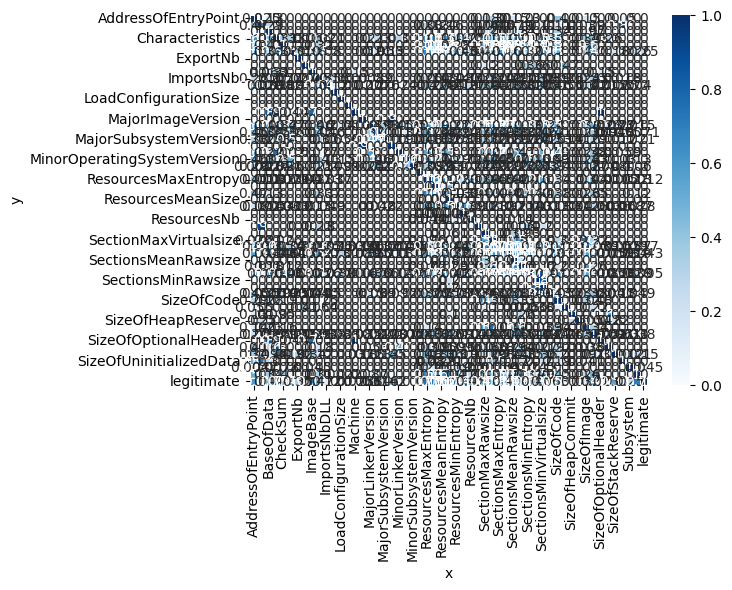

In [14]:
#οπτικοποίηση δεδομένων
matrix_df = pps.matrix(dataset_ok)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)